# 분류란?

*   지도학습 종류 중 하나
*   어떤 데이터가 주어졌을 때 그 데이터가 어떤 **범주**(클래스)에 속하는지를 알아내는 문제

*   정해진 답에서 고른다는 점에서 객관식 시험 문제를 푸는 것과 비슷하다

*   분류의 종류
   -  범주 두 개로 구분하는 **이항 분류**(binary classification)
   -  세 개 이상으로 구분하는 **다항 분류**(multi class classification)

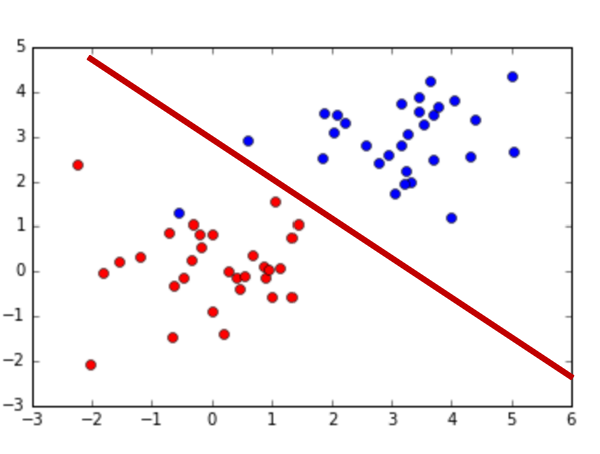

# 로지스틱 회귀(Logistic Regression)란?
 - 선형회귀 알고리즘으로 만든 **분류 알고리즘**
 - 데이터가 어떤 범주에 속할 **확률(0~1)**을 예측하고 그 값에 따라 **가능성이 더 높은 범주**에 속하는 것으로 **분류**
 -  0과 1사이의 값으로 나타내기 위해 **시그모이드**(sigmoid) 함수를 사용
 - **X에 대하여 가장 연관성이 높은 Y값(범주)을
예측한다**
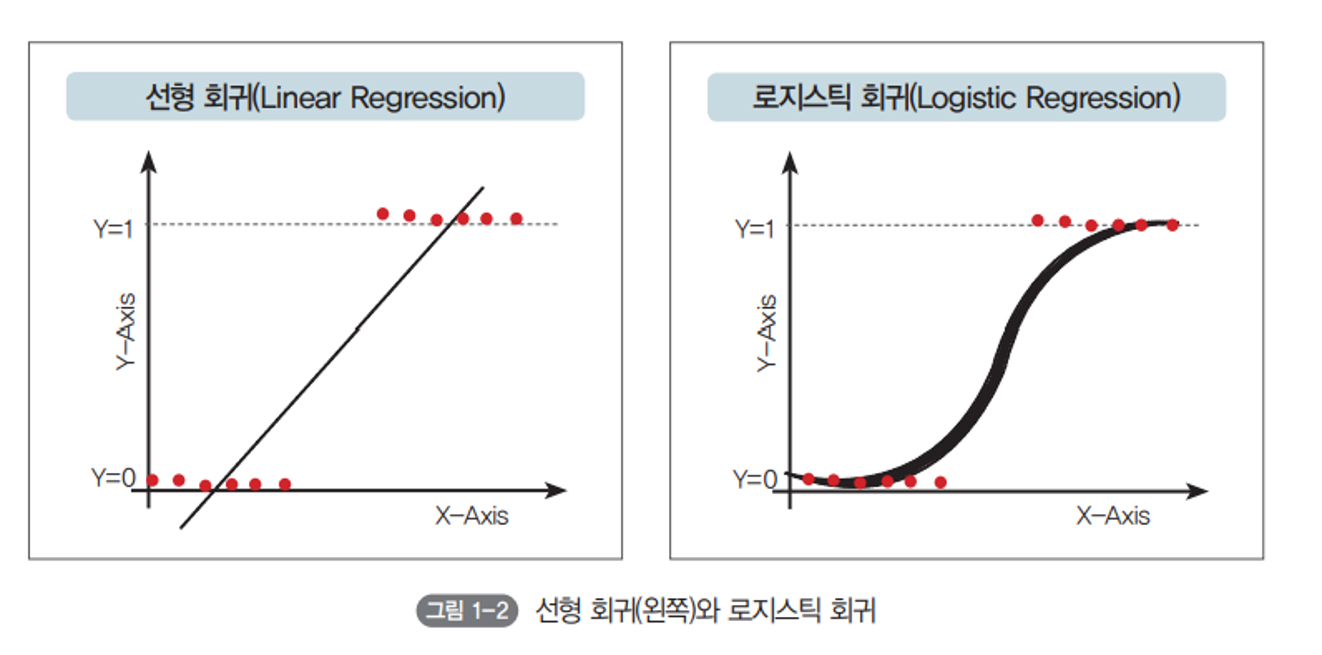






# 3. 당뇨 데이터로 초기 당뇨 진단하기
 - 새로 당뇨병에 걸렸거나 당뇨병 환자로 보이는 징후 및 증상 데이터를 가지고 당뇨 여부를 판단해보자
 - Diabetes Dataset : 2020년 520명의 15개 속성과 1개의 클래스를 나타냄
 - 속성(feature)는 15개
   - Gender: 성별/1은 남자, 2는 여자
   - Polyuria : 다뇨증/ 1은 예, 0은 아니오
   - Polydipsia : 조갈증
   - sudden weight loss : 갑작스러운 체중 감소
   - weakness : 기저질환
   - Polyphagia : 다식증
   - Genital thrush : 생식기 염증
   - visual blurring : 시각적 흐릿함
   - Itching : 가려움
   - Irritability : 과민성
   - delayed healing : 지연된 치유
   - partial paresis : 부분 마비
   - muscle stiffness : 근육 긴장도
   - Alopecia : 탈모
   - Obesity : 비만
 - 클래스(class)는 1개
   - 1은 당뇨 양성, 0은 당뇨 음성

 - 참고자료(UCI저장소)
   - https://archive-beta.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1)데이터 불러오기
- 당뇨병 징후 및 증상과 관련한 데이터를 불러오기
- 판다스의 csv 파일을 불러오는 read_csv() 함수를 통해 불러와 변수(df)에 저장
- 데이터 불러오기가 잘 되었는지 확인해보자
        -> 520명의 16가지 정보가 담겨져 있음.(속성 15개, 클래스 1개)

In [ ]:
df = pd.read_csv('/content/diabetes_data.csv')
print(df.shape) #shape는 이 파일의 크기를 출력하는 것이다. 520명의 데이터가 들어 있고, 16가지의 속성 클래스가 있기 때문에 크기는 520,16이 나오게 된다.
df.head() # 제일 윗 줄의 다섯 개를 출력하는 코드이다.

(520, 16)


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# 2)데이터 상관관계 분석하기
**<히트맵(Heat map)>**
 - 데이터의 값을 **색깔로 표현**하여 시각적으로 분석하는 데이터 시각화 기법
 - 보통 데이터 값이 높거나, 양이 많을 경우 진한 색을 , 낮거나 적은 경우 연한 색을 사용
 - 시본(seaborn, 파이선의 시각화 라이브러리) 모듈을 활용
  - 참고자료 :  http://seaborn.pydata.org/

In [4]:
import seaborn as sns

plt.figure(figsize=(10,8)) #표 사이즈 설정, 기본값 15,12
sns.heatmap(df.corr(), linewidth=0.1, vmax=1, cmap=plt.cm.YlOrRd, linecolor='white', annot=True) # heatmap 그래프를 사용하여 표현한다.
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x800 with 0 Axes>

# QUIZ
- 당뇨 발병 여부와 가장 연관이 있는 속성 두가지는 ?
  - 정답 : 다뇨, 조갈

  - 풀이: heatmap에서 연관도가 높을 수록 색깔이 진하게 출력되기 때문에, 가장 색이 짙은 polyuria, polydipsia가 가장 연관이 높다고 할 수 있다.


# 3)데이터 전처리하기
 - 함수를 사용하지 않고 직접 학습 데이터와 테스트 데이터를 구분 할 수 있다
        -> 70%를 학습 데이터로, 30%를 테스트 데이터로 나누기
        -> 변수(lim)에 데이터의 70% 지점을 정수로 저장
- iloc(integer location) : 데이터 프레임의 행이나 컬럼의 순서를 정수 값으로 추출하는 기능

x=df.iloc[:,0:15].to_numpy()

y=df.iloc[:,15].to_numpy()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=.3)

In [ ]:
# x=df.iloc[:,0:15].to_numpy()
# y=df.iloc[:,15].to_numpy()
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=.3)

# 데이터 전처리란 학습용 데이터와 테스트 데이터를 랜덤하게 나눈다.

In [ ]:
lim = int(len(df)*0.7)
train_x = df.iloc[0:lim,0:15].to_numpy()
test_x = df.iloc[lim: ,0:15].to_numpy()
train_y = df.iloc[0:lim,15].to_numpy()
test_y = df.iloc[lim: ,15].to_numpy()

# 리스트 구조를 이해하면 더 잘 이해할 수 있다.
# lim이라는 데이터 길이를 df의 길이에 0.7을 곱하여 정수형으로 반환
# 특정 위치값에 (해당되는 70%)를 학습용 데이터로, 나머지 데이터를 테스트 데이터로 넣는 작업을 의미한다.
# iris 작업 시에는 위의 코드블록을 사용하여 사용했지만, 여러가지 방법으로 나누어 줄 수 있다. 선택은 free

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

# 데이터가 아래와 같이 나뉘게 된다. y에는 정답이, x에는 문제가 들어간다.

((364, 15), (364,), (156, 15), (156,))

# 4) 기계학습 - 지도학습 - 분류(이항분류)

 - 로지스틱 회귀 알고리즘으로 당뇨진단 머신러닝 모델을 만들어보자
         -> 변수(log_reg)에 로지스틱 회귀 알고리즘(LogisticRegression)을 저장
         -> 여러 로지스틱 알고리즘 중 최적화 알고리즘을 선택(=lbfgs)
- 사이킷런(sklearn) : 여러 가지 머신러닝 알고리즘을 함수로 제공하는 모듈
- Lbfgs 알고리즘 :  로지스틱 회귀 알고리즘을 구현하는 최적화 알고리즘 중 가장 보편적인 방법

In [ ]:
#4. 기계학습_지도학습_분류(이항분류) 모델구성하기
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
#lbfgs => 최적화 알고리즘
# 로지스틱 회귀 제공 알고리즘 : 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'

 - 로지스틱 회귀 모델에 훈련 데이터(train_x, train_y)를 넣어 학습(fit)시키기
         -> 머신 러닝은 데이터를 학습하여 오차가 가장 작은 선을 찾는 일

In [ ]:
#4. 로지스틱 회귀 학습하기
model=log_reg.fit(train_x, train_y)

# 로지스틱 회귀의 방법을 LogisticRegression 으로 연결하고 그 이름을 log_reg 로 연결하였다.
# fit = 학습 과정

# 5)로지스틱 회귀 모델 확인하기
 - 학습 결과, 각 속성에 **가중치(기울기)**를 곱하고 **편항(절편)**을 더하는 **식(=모델)**을 구할 수 있음
         -> 15개 속성의 데이터를 식에 대입하여, 나온 결과 값에 따라 분류 할 수 있음
         -> 결과 값이 일정 기준 이상 이면 *당뇨*, 기준 미만이면, *당뇨가 아니라고 분류*

---


        
 -  Model.coef_: 각 속성(X, 독립변수)에 대한 가중치(기울기)
 -  Model.intercept_ : 초기 당뇨 진단 모델의 편향(절편)

In [ ]:
#5. 로지스틱 회귀 학습결과
w = model.coef_
b = model.intercept_
print(w)
print(b)

# 요소가 15개라서 기울기가 15개가 나온다.
# 모두 더하고 여러가지 해 주면 아래 값이 된다.

[[ 2.40981316  2.46697753  2.54075593  0.46099195  0.34028087  0.65400515
   1.09086249  0.44040846 -1.10732875  1.08033097 -0.40032738  0.72445785
  -0.45773319 -0.10597678  0.10861899]]
[-4.60361594]


# 6)머신러닝 모델 테스트
- 실제로 얼마나 잘 예측하는지 테스트 해보자
- 남은 30% 평가 데이터(test_x)로 predict 함수에 넣어 테스트 하자


---


- Y_prediction[i] : 학습결과, 모델로 예측한 값
- Test_y[i] : 실제 당뇨 여부
- Flatten() : Y_prediction의 결과가 2차원 배열이기에 1차원 배열로 바꿔주는 역할


In [ ]:
#6. 모델 테스트
Y_prediction = model.predict(test_x).flatten()#예측값
for i in range(10):
  label = test_y[i]
  prediction = Y_prediction[i]
  print("실제 당뇨여부: {:.0f}, 학습후 예측 당뇨여부: {:.0f}".format(label, prediction))

실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 1, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 1
실제 당뇨여부: 0, 학습후 예측 당뇨여부: 0


- 전체 테스트 결과에서 예측 값과 일치하는지를 확인하면 , 93%의 정확도가 나온다

In [ ]:
#7. 모델 평가하기
y_pred = model.predict(test_x)
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == test_y)))   # 맞은 / 전체 으로 직접 만들기
print("테스트 세트의 정확도 : {:.2f}".format(model.score(test_x, test_y)))     #함수 활용하기

테스트 세트의 정확도 : 0.93
테스트 세트의 정확도 : 0.93
